In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import sklearn.preprocessing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [361]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'dohod']

In [362]:
df = pd.read_csv("adult.data", names = names)
df_test = pd.read_csv("adult.test", names = names)

In [363]:
df.index

RangeIndex(start=0, stop=32561, step=1)

In [364]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [365]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [366]:
df_test = df_test[1:]
df_test.index = [i for i in range(df_test[1:].shape[0]+1)]
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [367]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  dohod           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [369]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  dohod           16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [370]:
def quest(x):
    if x == ' ?':
        return 'Не знаю'
    else:
        return x

In [371]:
for i in df.columns:
    df[i] = df[i].apply(lambda x: quest(x))
for i in df_test.columns:
    df_test[i] = df_test[i].apply(lambda x: quest(x))
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,Не знаю,103497.0,Some-college,10.0,Never-married,Не знаю,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [372]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [373]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
dohod                 2
dtype: int64

In [374]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [375]:
df['sex'].replace({' Male': 0, ' Female': 1}, inplace = True)
df['dohod'].replace({' <=50K': 0, ' >50K': 1}, inplace = True)
# доход  <=50K будет 0, доход  >50K будет 1
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [376]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dohod             0
dtype: int64

In [377]:
df_test.nunique()

age                  73
workclass             9
fnlwgt            12787
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        113
capital-loss         82
hours-per-week       89
native-country       41
dohod                 2
dtype: int64

In [378]:
df_test['sex'].replace({' Male': 0, ' Female': 1}, inplace = True)
df_test['dohod'].replace({' <=50K.': 0, ' >50K.': 1}, inplace = True)
# доход  <=50K будет 0, доход  >50K будет 1
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,0,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,0,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,0,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688.0,0.0,40.0,United-States,1
4,18,Не знаю,103497.0,Some-college,10.0,Never-married,Не знаю,Own-child,White,1,0.0,0.0,30.0,United-States,0


In [379]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dohod             0
dtype: int64

In [380]:
df_test.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,1,0.0,0.0,36.0,United-States,0
16277,64,Не знаю,321403.0,HS-grad,9.0,Widowed,Не знаю,Other-relative,Black,0,0.0,0.0,40.0,United-States,0
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,0,0.0,0.0,50.0,United-States,0
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,0,5455.0,0.0,40.0,United-States,0
16280,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0.0,0.0,60.0,United-States,1


# Преобразование признаков, уникальных значений которых больше 3 с помощью OHE

In [381]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dohod              int64
dtype: object

In [387]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'Не знаю',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [389]:
df_test['native-country'].unique()

array([' United-States', 'Не знаю', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

# Так как в обучающей и тестовой выборки имеются разные страны, то даный признак следует убрать

In [390]:
df.drop('native-country', axis = 1, inplace = True)
df_test.drop('native-country', axis = 1, inplace = True)

In [391]:
numeric_features = df.select_dtypes(include=['int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns #drop(['dohod'], axis=1).columns

In [392]:
numeric_features

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'dohod'],
      dtype='object')

In [393]:
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race'],
      dtype='object')

In [394]:
df[categorical_features].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
dtype: int64

In [395]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse=False) #ce.TargetEncoder()

In [396]:
for col in categorical_features:
    encoding = pd.DataFrame(encoder.fit_transform(df[col].values.reshape(-1, 1)))
    df = pd.concat([encoding, df], axis = 1)
    df.drop(col, axis = 1, inplace = True)
df

,0,1,2,3,4,0,1,2,3,4,...,7,8,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,39,77516,13,0,2174,0,40,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50,83311,13,0,0,0,13,0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,38,215646,9,0,0,0,40,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,53,234721,7,0,0,0,40,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28,338409,13,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27,257302,12,1,0,0,38,0
32557,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40,154374,9,0,0,0,40,1
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,58,151910,9,1,0,0,40,0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,22,201490,9,0,0,0,20,0


In [397]:
scaler = StandardScaler() #Стандартизация числовых признаков

for col in numeric_features:
    if col != 'dohod':
        df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
df

,0,1,2,3,4,0,1,2,3,4,...,7,8,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.030671,-1.063611,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.837109,-1.008707,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-0.042642,0.245079,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.057047,0.425801,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.775768,1.408176,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.849080,0.639741,0.746039,1.422331,-0.145920,-0.21666,-0.197409,0
32557,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.103983,-0.335433,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,1
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.423610,-0.358777,-0.420060,1.422331,-0.145920,-0.21666,-0.035429,0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-1.215643,0.110960,-0.420060,-0.703071,-0.145920,-0.21666,-1.655225,0


In [398]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,0,0.0,0.0,40.0,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,0,0.0,0.0,50.0,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,0,0.0,0.0,40.0,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688.0,0.0,40.0,1
4,18,Не знаю,103497.0,Some-college,10.0,Never-married,Не знаю,Own-child,White,1,0.0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,1,0.0,0.0,36.0,0
16277,64,Не знаю,321403.0,HS-grad,9.0,Widowed,Не знаю,Other-relative,Black,0,0.0,0.0,40.0,0
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,0,0.0,0.0,50.0,0
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,0,5455.0,0.0,40.0,0


In [399]:
df_test_new = df_test

In [400]:
df_test_new.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                 int64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
dohod               int64
dtype: object

In [401]:
numeric_test = df_test_new.select_dtypes(include=['int64', 'float64']).columns
categorical_test = df_test_new.select_dtypes(include=['object']).columns #drop(['dohod'], axis=1).columns

In [402]:
numeric_test

Index(['fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'dohod'],
      dtype='object')

In [403]:
categorical_test

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race'],
      dtype='object')

In [404]:
df_test_new[categorical_features].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
dtype: int64

In [405]:
scaler = StandardScaler() #Стандартизация числовых признаков

for col in numeric_test:
    if col != 'dohod':
        df_test_new[col] = scaler.fit_transform(np.array(df_test_new[col]).reshape(-1, 1))
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,dohod
0,25,Private,0.353474,11th,-1.196864,Never-married,Machine-op-inspct,Own-child,Black,-0.706521,-0.142662,-0.218062,-0.031432,0
1,38,Private,-0.942391,HS-grad,-0.417886,Married-civ-spouse,Farming-fishing,Husband,White,-0.706521,-0.142662,-0.218062,0.769918,0
2,28,Local-gov,1.395450,Assoc-acdm,0.750582,Married-civ-spouse,Protective-serv,Husband,White,-0.706521,-0.142662,-0.218062,-0.031432,1
3,44,Private,-0.275397,Some-college,-0.028397,Married-civ-spouse,Machine-op-inspct,Husband,Black,-0.706521,0.871091,-0.218062,-0.031432,1
4,18,Не знаю,-0.812954,Some-college,-0.028397,Never-married,Не знаю,Own-child,White,1.415387,-0.142662,-0.218062,-0.832781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,0.245794,Bachelors,1.140071,Divorced,Prof-specialty,Not-in-family,White,1.415387,-0.142662,-0.218062,-0.351972,0
16277,64,Не знаю,1.248371,HS-grad,-0.417886,Widowed,Не знаю,Other-relative,Black,-0.706521,-0.142662,-0.218062,-0.031432,0
16278,38,Private,1.755221,Bachelors,1.140071,Married-civ-spouse,Prof-specialty,Husband,White,-0.706521,-0.142662,-0.218062,0.769918,0
16279,44,Private,-0.998420,Bachelors,1.140071,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,-0.706521,0.576644,-0.218062,-0.031432,0


In [411]:
df_test['workclass'].isnull().sum()

0

In [412]:
df_test_new = df_test

In [413]:
for col in categorical_test:
    print(f'в {col} содерижтся {df_test_new[col].isnull().sum()} значений nan')#np.isna(df[col]).sum

в age содерижтся 0 значений nan
в workclass содерижтся 0 значений nan
в education содерижтся 0 значений nan
в marital-status содерижтся 0 значений nan
в occupation содерижтся 0 значений nan
в relationship содерижтся 0 значений nan
в race содерижтся 0 значений nan


In [414]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse=False) #ce.TargetEncoder()

In [415]:
for col in categorical_features:
    print(col)
    #encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)
    encoding = pd.DataFrame(encoder.fit_transform(df_test_new[col].values.reshape(-1, 1)))
    print(encoding.shape)
    df_test_new = pd.concat([encoding, df_test_new], axis = 1)
    df_test_new.drop(col, axis = 1, inplace = True)
df_test_new

workclass
(16281, 9)
education
(16281, 16)
marital-status
(16281, 7)
occupation
(16281, 15)
relationship
(16281, 6)
race
(16281, 5)


,0,1,2,3,4,0,1,2,3,4,...,7,8,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,25,0.353474,-1.196864,-0.706521,-0.142662,-0.218062,-0.031432,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38,-0.942391,-0.417886,-0.706521,-0.142662,-0.218062,0.769918,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28,1.395450,0.750582,-0.706521,-0.142662,-0.218062,-0.031432,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44,-0.275397,-0.028397,-0.706521,0.871091,-0.218062,-0.031432,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,18,-0.812954,-0.028397,1.415387,-0.142662,-0.218062,-0.832781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,39,0.245794,1.140071,1.415387,-0.142662,-0.218062,-0.351972,0
16277,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,64,1.248371,-0.417886,-0.706521,-0.142662,-0.218062,-0.031432,0
16278,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38,1.755221,1.140071,-0.706521,-0.142662,-0.218062,0.769918,0
16279,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,44,-0.998420,1.140071,-0.706521,0.576644,-0.218062,-0.031432,0


In [416]:
X = df.drop('dohod', axis = 1)
y = df['dohod']

In [417]:
X_test = df_test_new.drop('dohod', axis = 1)
y_test = df_test_new['dohod']

In [418]:
len(X_test), len(y_test)

(16281, 16281)

# Логистическая регрессия

In [419]:
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X, y)

LogisticRegression(n_jobs=-1, random_state=7)

In [420]:
round(logit.score(X, y), 3)

0.852

In [421]:
round(logit.score(X_test, y_test), 3)

0.254

In [424]:
predict_logist = logit.predict(X_test)
accuracy_score(y_test, predict_logist)

0.2537313432835821

In [426]:
precision_score(y_test, predict_logist, average='micro')

0.2537313432835821

In [427]:
recall_score(y_test, predict_logist, average='micro')

0.2537313432835821

In [428]:
print(classification_report(y_test, predict_logist))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04     12435
           1       0.24      1.00      0.39      3846

    accuracy                           0.25     16281
   macro avg       0.62      0.51      0.22     16281
weighted avg       0.82      0.25      0.13     16281



In [435]:
roc_auc_score(y_test, predict_logist)

0.51145958986731

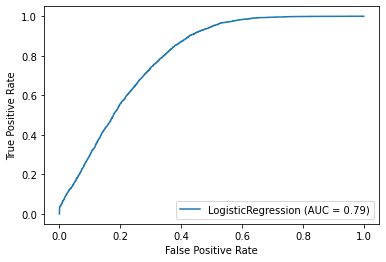

In [436]:
plot_roc_curve(logit, X_test, y_test)

# Метод опорных векторов

In [430]:
model_svm = svm.SVC(kernel='linear', C=1.0, probability = True)
model_svm.fit(X, y)
predictions = model_svm.predict(X_test)

In [437]:
roc_auc_score(y_test, predictions)

0.55418309374112

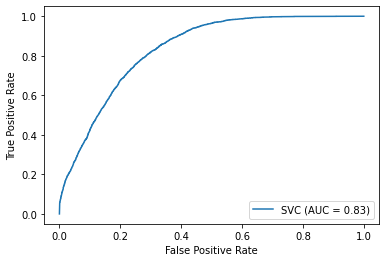

In [438]:
plot_roc_curve(model_svm, X_test, y_test)

# KNN

In [439]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [449]:
%%time

model_knn = KNeighborsClassifier(n_neighbors=10) #Задаем количество соседий на угад
knn_params = {'n_neighbors': list(range(3, 11)) + list(range(20, 30))}
model_knn_grid = GridSearchCV(model_knn, knn_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = False)
model_knn_grid.fit(X, y)
knn_pred = model_knn_grid.predict(X_test)

print("Лучшее качество обучение = {}".format(model_knn_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_knn_grid.best_params_))
print("AUC ROC = {}".format(roc_auc_score(y_test, knn_pred)))

Лучшее качество обучение = 0.8427876716798872
Оптимальное количество соседей = {'n_neighbors': 28}
AUC ROC = 0.5092303692147686
Wall time: 17min 40s


# DT

In [451]:
%%time

model_tree = DecisionTreeClassifier(max_depth=15, random_state=17) #Задаем количество соседий на угад
tree_params = {'max_depth': list(range(1, 15)),
               'max_features': list(range(4,19)) + list(range(45, 60))}

model_tree_grid = GridSearchCV(model_tree, tree_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_tree_grid.fit(X, y)
tree_pred = model_tree_grid.predict(X_test)

print("Лучшее качество обучение = {}".format(model_tree_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_tree_grid.best_params_))
print("AUC ROC = {}".format(roc_auc_score(y_test, tree_pred)))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  2.4min finished


Лучшее качество обучение = 0.8566998680771135
Оптимальное количество соседей = {'max_depth': 8, 'max_features': 52}
AUC ROC = 0.6939763839045722
Wall time: 2min 21s


# Случайные леса

In [453]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
model_rand_forest = RandomForestClassifier(random_state = 0, n_estimators = 500, n_jobs = -1)
model_forest = model_rand_forest.fit(X, y)
pred_forest = model_forest.predict(X_test)
print("AUC ROC = {}".format(roc_auc_score(y_test, pred_forest)))

AUC ROC = 0.7315584251838106


# Применение Tatget encoder

In [458]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'dohod']

In [459]:
df = pd.read_csv("adult.data", names = names)
df_test = pd.read_csv("adult.test", names = names)

In [460]:
df_test = df_test[1:]
df_test.index = [i for i in range(df_test[1:].shape[0]+1)]
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [461]:
def quest(x):
    if x == ' ?':
        return 'Не знаю'
    else:
        return x

In [462]:
for i in df.columns:
    df[i] = df[i].apply(lambda x: quest(x))
for i in df_test.columns:
    df_test[i] = df_test[i].apply(lambda x: quest(x))
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,Не знаю,103497.0,Some-college,10.0,Never-married,Не знаю,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [463]:
df['sex'].replace({' Male': 0, ' Female': 1}, inplace = True)
df['dohod'].replace({' <=50K': 0, ' >50K': 1}, inplace = True)
# доход  <=50K будет 0, доход  >50K будет 1
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [464]:
df_test['sex'].replace({' Male': 0, ' Female': 1}, inplace = True)
df_test['dohod'].replace({' <=50K.': 0, ' >50K.': 1}, inplace = True)
# доход  <=50K будет 0, доход  >50K будет 1
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dohod
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,0,0.0,0.0,40.0,United-States,0
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,0,0.0,0.0,50.0,United-States,0
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,0,0.0,0.0,40.0,United-States,1
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688.0,0.0,40.0,United-States,1
4,18,Не знаю,103497.0,Some-college,10.0,Never-married,Не знаю,Own-child,White,1,0.0,0.0,30.0,United-States,0


In [466]:
df.drop('native-country', axis = 1, inplace = True)
df_test.drop('native-country', axis = 1, inplace = True)

In [468]:
num_feat = df.select_dtypes(include=['int64', 'float64']).columns
cat_feat = df.select_dtypes(include=['object']).columns 

In [470]:
X = df.drop('dohod', axis = 1)
y = df['dohod']
X_test =  df_test.drop('dohod', axis = 1)
y_test = df_test['dohod']

In [502]:
encoder = ce.TargetEncoder()

for col in cat_feat:
    encoding = pd.DataFrame(encoder.fit_transform(df[col].values.reshape(-1, 1), y = df['dohod']))
    df = pd.concat([encoding, df], axis = 1)
    df.drop(col, axis = 1, inplace = True)
df

,0,0,0,0,0,0,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.25586,0.103070,0.134483,0.045961,0.414753,0.271957,39,77516,13,0,2174,0,40,0
1,0.25586,0.448571,0.484014,0.446848,0.414753,0.284927,50,83311,13,0,0,0,13,0
2,0.25586,0.103070,0.062774,0.104209,0.159509,0.218673,38,215646,9,0,0,0,40,0
3,0.12388,0.448571,0.062774,0.446848,0.051064,0.218673,53,234721,7,0,0,0,40,0
4,0.12388,0.475128,0.449034,0.446848,0.414753,0.218673,28,338409,13,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.25586,0.475128,0.304957,0.446848,0.248360,0.218673,27,257302,12,1,0,0,38,0
32557,0.25586,0.448571,0.124875,0.446848,0.159509,0.218673,40,154374,9,0,0,0,40,1
32558,0.25586,0.063262,0.134483,0.085599,0.159509,0.218673,58,151910,9,1,0,0,40,0
32559,0.25586,0.013220,0.134483,0.045961,0.159509,0.218673,22,201490,9,0,0,0,20,0


In [503]:
scaler = StandardScaler() #Стандартизация числовых признаков

for col in num_feat:
    if col != 'dohod':
        df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
df

,0,0,0,0,0,0,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.25586,0.103070,0.134483,0.045961,0.414753,0.271957,0.030671,-1.063611,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0
1,0.25586,0.448571,0.484014,0.446848,0.414753,0.284927,0.837109,-1.008707,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0
2,0.25586,0.103070,0.062774,0.104209,0.159509,0.218673,-0.042642,0.245079,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0
3,0.12388,0.448571,0.062774,0.446848,0.051064,0.218673,1.057047,0.425801,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0
4,0.12388,0.475128,0.449034,0.446848,0.414753,0.218673,-0.775768,1.408176,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.25586,0.475128,0.304957,0.446848,0.248360,0.218673,-0.849080,0.639741,0.746039,1.422331,-0.145920,-0.21666,-0.197409,0
32557,0.25586,0.448571,0.124875,0.446848,0.159509,0.218673,0.103983,-0.335433,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,1
32558,0.25586,0.063262,0.134483,0.085599,0.159509,0.218673,1.423610,-0.358777,-0.420060,1.422331,-0.145920,-0.21666,-0.035429,0
32559,0.25586,0.013220,0.134483,0.045961,0.159509,0.218673,-1.215643,0.110960,-0.420060,-0.703071,-0.145920,-0.21666,-1.655225,0


In [504]:
encoder = ce.TargetEncoder()

for col in cat_feat:
    encoding = pd.DataFrame(encoder.fit_transform(df_test[col].values.reshape(-1, 1), y = df_test['dohod']))
    df_test = pd.concat([encoding, df_test], axis = 1)
    df_test.drop(col, axis = 1, inplace = True)

scaler = StandardScaler() #Стандартизация числовых признаков

for col in num_feat:
    if col != 'dohod':
        df_test[col] = scaler.fit_transform(np.array(df_test[col]).reshape(-1, 1))
df_test

,0,0,0,0,0,0,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.114670,0.017509,0.119608,0.044534,0.050235,0.216236,-0.994129,0.353474,-1.196864,-0.706521,-0.142662,-0.218062,-0.031432,0
1,0.250251,0.448873,0.116935,0.444685,0.156729,0.216236,-0.055417,-0.942391,-0.417886,-0.706521,-0.142662,-0.218062,0.769918,0
2,0.250251,0.448873,0.290419,0.444685,0.277154,0.297220,-0.777503,1.395450,0.750582,-0.706521,-0.142662,-0.218062,-0.031432,1
3,0.114670,0.448873,0.119608,0.444685,0.188458,0.216236,0.377835,-0.275397,-0.028397,-0.706521,0.871091,-0.218062,-0.031432,1
4,0.250251,0.017509,0.076605,0.044534,0.188458,0.076843,-1.499590,-0.812954,-0.028397,1.415387,-0.142662,-0.218062,-0.832781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.250251,0.098177,0.455217,0.094977,0.408989,0.216236,0.016791,0.245794,1.140071,1.415387,-0.142662,-0.218062,-0.351972,0
16277,0.114670,0.028571,0.076605,0.081905,0.156729,0.076843,1.822007,1.248371,-0.417886,-0.706521,-0.142662,-0.218062,-0.031432,0
16278,0.250251,0.448873,0.455217,0.444685,0.408989,0.216236,-0.055417,1.755221,1.140071,-0.706521,-0.142662,-0.218062,0.769918,0
16279,0.277083,0.017509,0.141771,0.094977,0.408989,0.216236,0.377835,-0.998420,1.140071,-0.706521,0.576644,-0.218062,-0.031432,0


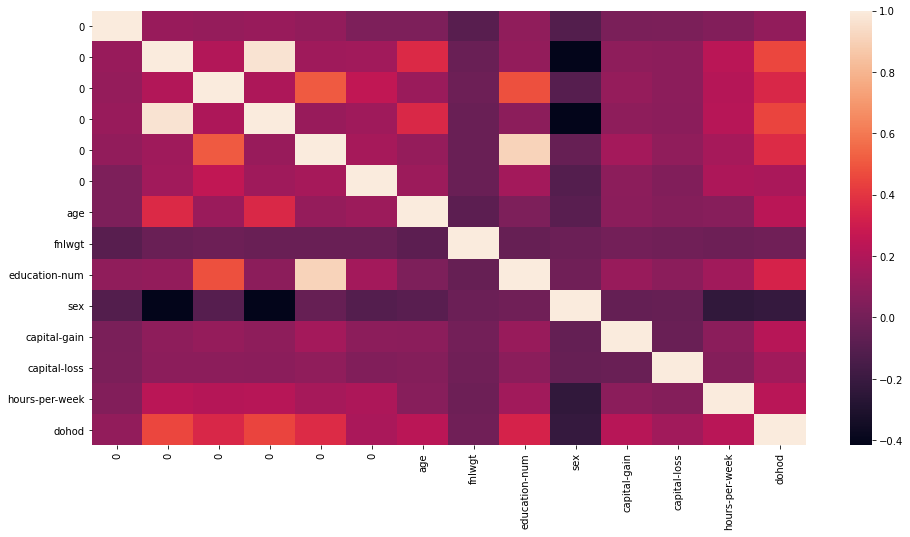

In [507]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(df.corr(), ax = ax)

In [522]:
df.columns = [1, 2, 3, 4, 5, 6, 'age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss', 
              'hours-per-week', 'dohod']

In [523]:
df

,1,2,3,4,5,6,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.25586,0.103070,0.134483,0.045961,0.414753,0.271957,0.030671,-1.063611,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0
1,0.25586,0.448571,0.484014,0.446848,0.414753,0.284927,0.837109,-1.008707,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0
2,0.25586,0.103070,0.062774,0.104209,0.159509,0.218673,-0.042642,0.245079,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0
3,0.12388,0.448571,0.062774,0.446848,0.051064,0.218673,1.057047,0.425801,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0
4,0.12388,0.475128,0.449034,0.446848,0.414753,0.218673,-0.775768,1.408176,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.25586,0.475128,0.304957,0.446848,0.248360,0.218673,-0.849080,0.639741,0.746039,1.422331,-0.145920,-0.21666,-0.197409,0
32557,0.25586,0.448571,0.124875,0.446848,0.159509,0.218673,0.103983,-0.335433,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,1
32558,0.25586,0.063262,0.134483,0.085599,0.159509,0.218673,1.423610,-0.358777,-0.420060,1.422331,-0.145920,-0.21666,-0.035429,0
32559,0.25586,0.013220,0.134483,0.045961,0.159509,0.218673,-1.215643,0.110960,-0.420060,-0.703071,-0.145920,-0.21666,-1.655225,0


In [524]:
df_test.columns = df.columns
df_test.head()

,1,2,3,4,5,6,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.114670,0.017509,0.119608,0.044534,0.050235,0.216236,-0.994129,0.353474,-1.196864,-0.706521,-0.142662,-0.218062,-0.031432,0
1,0.250251,0.448873,0.116935,0.444685,0.156729,0.216236,-0.055417,-0.942391,-0.417886,-0.706521,-0.142662,-0.218062,0.769918,0
2,0.250251,0.448873,0.290419,0.444685,0.277154,0.297220,-0.777503,1.395450,0.750582,-0.706521,-0.142662,-0.218062,-0.031432,1
3,0.114670,0.448873,0.119608,0.444685,0.188458,0.216236,0.377835,-0.275397,-0.028397,-0.706521,0.871091,-0.218062,-0.031432,1
4,0.250251,0.017509,0.076605,0.044534,0.188458,0.076843,-1.499590,-0.812954,-0.028397,1.415387,-0.142662,-0.218062,-0.832781,0


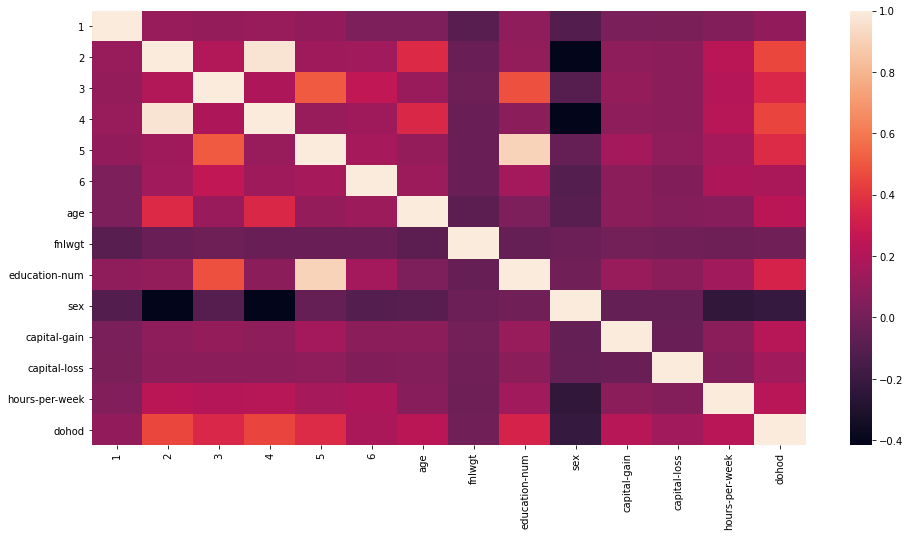

In [525]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(df.corr(), ax = ax)

In [526]:
df_new = df.drop([3, 4, 5], axis = 1)
df_new

,1,2,6,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.25586,0.103070,0.271957,0.030671,-1.063611,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0
1,0.25586,0.448571,0.284927,0.837109,-1.008707,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0
2,0.25586,0.103070,0.218673,-0.042642,0.245079,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0
3,0.12388,0.448571,0.218673,1.057047,0.425801,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0
4,0.12388,0.475128,0.218673,-0.775768,1.408176,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,0.25586,0.475128,0.218673,-0.849080,0.639741,0.746039,1.422331,-0.145920,-0.21666,-0.197409,0
32557,0.25586,0.448571,0.218673,0.103983,-0.335433,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,1
32558,0.25586,0.063262,0.218673,1.423610,-0.358777,-0.420060,1.422331,-0.145920,-0.21666,-0.035429,0
32559,0.25586,0.013220,0.218673,-1.215643,0.110960,-0.420060,-0.703071,-0.145920,-0.21666,-1.655225,0


In [527]:
df_new_test = df_test.drop([3, 4, 5], axis = 1)
df_new_test

,1,2,6,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,dohod
0,0.114670,0.017509,0.216236,-0.994129,0.353474,-1.196864,-0.706521,-0.142662,-0.218062,-0.031432,0
1,0.250251,0.448873,0.216236,-0.055417,-0.942391,-0.417886,-0.706521,-0.142662,-0.218062,0.769918,0
2,0.250251,0.448873,0.297220,-0.777503,1.395450,0.750582,-0.706521,-0.142662,-0.218062,-0.031432,1
3,0.114670,0.448873,0.216236,0.377835,-0.275397,-0.028397,-0.706521,0.871091,-0.218062,-0.031432,1
4,0.250251,0.017509,0.076843,-1.499590,-0.812954,-0.028397,1.415387,-0.142662,-0.218062,-0.832781,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,0.250251,0.098177,0.216236,0.016791,0.245794,1.140071,1.415387,-0.142662,-0.218062,-0.351972,0
16277,0.114670,0.028571,0.076843,1.822007,1.248371,-0.417886,-0.706521,-0.142662,-0.218062,-0.031432,0
16278,0.250251,0.448873,0.216236,-0.055417,1.755221,1.140071,-0.706521,-0.142662,-0.218062,0.769918,0
16279,0.277083,0.017509,0.216236,0.377835,-0.998420,1.140071,-0.706521,0.576644,-0.218062,-0.031432,0


In [532]:
X = df_new.drop('dohod', axis = 1)
y = df_new['dohod']
X_test =  df_new_test.drop('dohod', axis = 1)
y_test = df_new_test['dohod']

In [533]:
forest = RandomForestClassifier(random_state = 0, n_estimators = 500, n_jobs = -1)
model_forest = forest.fit(X, y)
pred_ = model_forest.predict(X_test)
print("AUC ROC = {}".format(roc_auc_score(y_test, pred_)))

AUC ROC = 0.757730714536181


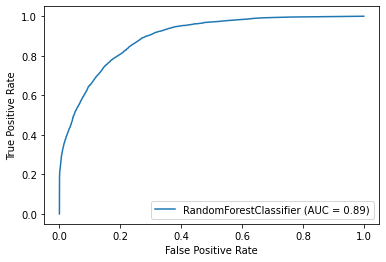

In [537]:
plot_roc_curve(forest, X_test, y_test)

In [535]:
%%time

model_tree = RandomForestClassifier(random_state = 0, n_estimators = 500, n_jobs = -1) #Задаем количество соседий на угад
forest_params = {'n_estimators': list(range(190, 200))}

model_forest_grid = GridSearchCV(model_tree, forest_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_forest_grid.fit(X, y)
forest_pred = model_forest_grid.predict(X_test)

print("Лучшее качество обучение = {}".format(model_forest_grid.best_score_))
print("Оптимальное количество деревьвев = {}".format(model_forest_grid.best_params_))
print("AUC ROC = {}".format(roc_auc_score(y_test, forest_pred)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.7min finished


Лучшее качество обучение = 0.8502196844262713
Оптимальное количество деревьвев = {'n_estimators': 191}
AUC ROC = 0.7577280172027148
Wall time: 3min 53s


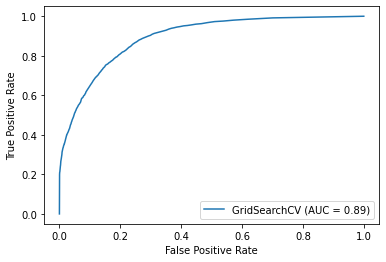

In [542]:
plot_roc_curve(model_forest_grid, X_test, y_test)

# Лучшее качество модели продемонстрировали случаные леса с AUC-ROC = 0.76, и AUC = 0.89. Данный алгоритм продемонстрировал хорошую обучаемость, так как модель строится не на одном дереве, а на множестве, то есть модель по своей сути больше обучается